# Group 4
Henry Oyedeji - 202189425

Theodoros Charalambous - 202190113

Callum Joyce - 202180454

Calum Shackley - 202165307

Varun Sinha - 202180663

# CS985/6 Spotify Regression Problem 2022

The aim in this problem is to predict the popularity score of a song using the various attributes of the data we are given.

# Introduction
The aim of this Jupyter Notebook file is to apply machine learning algorithm to a real dataset. The dataset comes from Spotify which captures various attributes about the songs and also include a popularity score. This project is further divided into 2 steps. First is to perform Exploratory Data Analysis, which will include the pre-liminary analysis of data, handling the
missing values and visual analysis as well. The second part will be to perfrom Regression Machine Learning method which will aim to predict the popularity of a song. The conclusion of the project will discuss the performance of the model in the Kaggle in-class competetion.

# 1.0 Loading required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings


warnings.simplefilter('ignore', category=FutureWarning)
warnings.simplefilter('ignore', category=UserWarning)
sns.set(style="white")

## Reading the data

In [5]:
filepath = "CS98XRegressionTrain.csv"
filepath_test = "CS98XRegressionTest.csv"

In [6]:
# Read Train Data
music_df = pd.read_csv(filepath)

In [8]:
music_df.head(3)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77


Listing the attributes of our data

In [10]:
music_df.columns.tolist()

['Id',
 'title',
 'artist',
 'top genre',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop']

In [11]:
print("Train Shape: ", music_df.shape)

Train Shape:  (453, 15)


# Handling Missing Data
Checking for any missing values and the type of the features

In [12]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


From the information above, only top genre has missing values, a column we will drop later
Reading the test data

In [11]:
# Read Test Data
music_test_df = pd.read_csv(filepath_test)

In [12]:
music_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         114 non-null    int64 
 1   title      114 non-null    object
 2   artist     114 non-null    object
 3   top genre  113 non-null    object
 4   year       114 non-null    int64 
 5   bpm        114 non-null    int64 
 6   nrgy       114 non-null    int64 
 7   dnce       114 non-null    int64 
 8   dB         114 non-null    int64 
 9   live       114 non-null    int64 
 10  val        114 non-null    int64 
 11  dur        114 non-null    int64 
 12  acous      114 non-null    int64 
 13  spch       114 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 12.6+ KB


# 2.0 Exploratory Data Analysis

In the following code we check if certain artists affect the popularity score of the songs and the reason this can happen is because certain songs get popular because of the artist. This will be investigated in the dataset

In [13]:
#Check the top common artists
artist_count = music_df["artist"].value_counts()
artist_count.head(10)

Elton John             9
Queen                  7
ABBA                   7
The Beatles            6
Rihanna                5
Mariah Carey           5
Whitney Houston        5
Taylor Swift           4
The Black Eyed Peas    3
Madonna                3
Name: artist, dtype: int64

According to the output we can see that in the data set some artists appear quite frequently. We checked out the mean popularity score of the artists

In [14]:
artist_pop = music_df[["artist", "pop"]]
artist_pop.sort_values("pop", ascending = False)

,artist,pop
294,Queen,84
234,Coldplay,83
263,TOTO,83
337,The Beatles,82
162,Queen,82
...,...,...
72,Ike Carpenter Orchestra,28
265,Terry Dene,27
252,Suzi Miller And Johnson Brothers,27
357,Rusty Draper,26


In [15]:
# Checking the popularity of the top common artist
popu_artist = ["Elton John", "ABBA", "Queen", "The Beatles", "Mariah Carey", "Whitney Houston", "Rihanna", "Taylor Swift"]
#artist_pop.loc[(artist_pop.artist == popu_artist)]
for i in popu_artist:
    mean = artist_pop[artist_pop["artist"] == i].mean()
    artist = i
    artist_dic = { artist: mean}
    artist_dic_df = pd.DataFrame(artist_dic)
    print(artist_dic_df)

     Elton John
pop   68.777778
          ABBA
pop  66.714286
         Queen
pop  73.285714
     The Beatles
pop         76.5
     Mariah Carey
pop          66.2
     Whitney Houston
pop             65.8
     Rihanna
pop     73.8
     Taylor Swift
pop          70.5


From the information above, we can see all the popular artists have a mean popularity score of at least 65 and at most 76 which are very high scores compared to the rest of the popularity scores

## Checking popularity score distribution

### Histogram

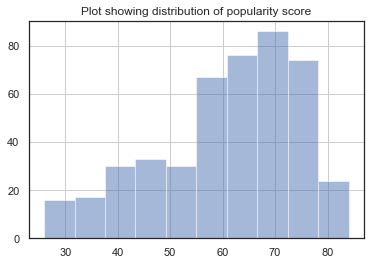

In [16]:
# Histogram Plot of Popularity
music_df["pop"].hist(bins=10, alpha=0.5)

plt.title("Plot showing distribution of popularity score")
plt.show()

The figure above is a histogram which shows the distribution of the popularity score and we can see that the distribution is shifted on the left with most of the popularity score between 50 and 75

### Popularity Density Plot

Text(0, 0.5, 'Density')

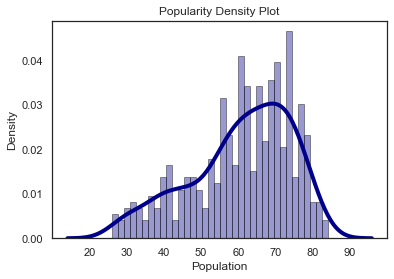

In [41]:
sns.distplot(music_df['pop'], hist=True, kde=True,
bins=int(180/5), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.title("Popularity Density Plot")
plt.xlabel('Population')
plt.ylabel('Density')

In [37]:
music_df.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


Mean popularity score is 60, while the highest is 84

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'bpm'}>],
       [<AxesSubplot:title={'center':'nrgy'}>,
        <AxesSubplot:title={'center':'dnce'}>,
        <AxesSubplot:title={'center':'dB'}>],
       [<AxesSubplot:title={'center':'live'}>,
        <AxesSubplot:title={'center':'val'}>,
        <AxesSubplot:title={'center':'dur'}>],
       [<AxesSubplot:title={'center':'acous'}>,
        <AxesSubplot:title={'center':'spch'}>,
        <AxesSubplot:title={'center':'pop'}>]], dtype=object)

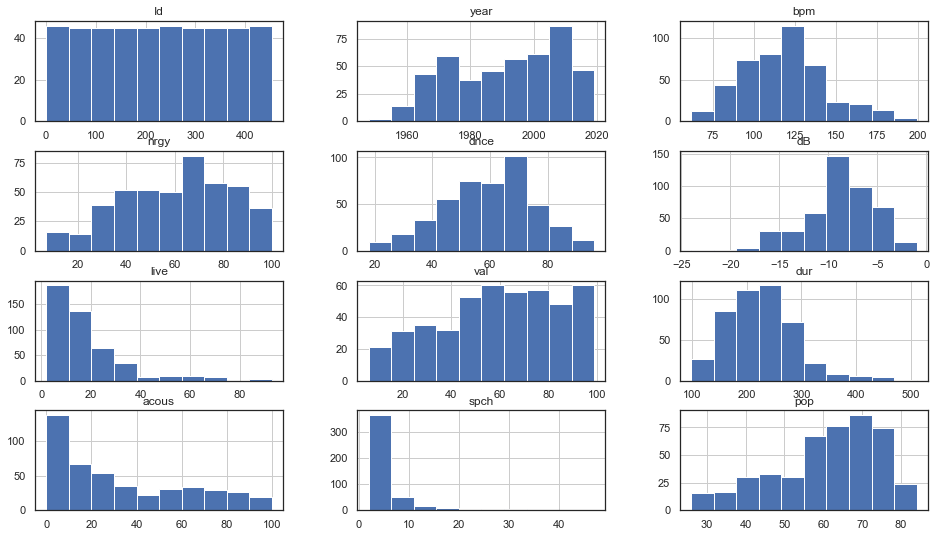

In [24]:
music_df.hist(bins=10, figsize=(16,9))

In the above figure we can see the histograms of each attribute in our data. We can see that histogram for bpm, nrgy and dnce are the only ones closest to a normal distribution.

## Subsetting the needed features
We will remove the year and Id columns since they are not so important for the prediction of the popularity score of a song and then we will perform one-hot encoding on the artist column later after futher EDA.

In [17]:
# Numeric Features With Artist
num_features = ['artist', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

# Just NUmeric Features
numeric_features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

We have created 2 lists in which one of them contains all attributes except year and Id and the other one contains all attributes except year, Id and artist.

In [23]:
# Creating a dataframe that contains all numerical attributes along with artist.
music_df_num = music_df[num_features]

## Checking for Outliers

### Boxplot
In order to check for any outliers in the dataset, boxplot was generated. Boxplot is an effective way of analysing the dataset statistically in terms of min value, 25%, 50% (median value), 75% quantile and max value.


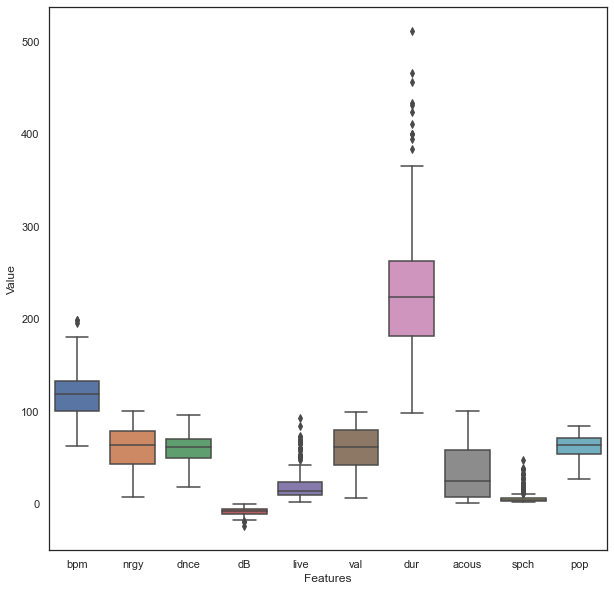

In [32]:
plt.figure(figsize = (10,10))
sns.boxplot(data=music_df_num.drop(['artist'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

## Co-relation between variables
Before analysing all the variables independently, in order to get an idea how the variables are corelated to each other, a heat map was generated using 'sns.heatmap()'. Most of the variables in the dataset are positively corelated to each other which means they implepent similar behavior.

In [22]:
corr_matrix = music_df_num.corr()
corr_matrix
corr_matrix["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.363266
dB       0.316854
nrgy     0.303797
dnce     0.258670
spch     0.130955
bpm      0.055024
val     -0.018713
live    -0.051364
acous   -0.465875
Name: pop, dtype: float64

This output shows the correlation between popularity score and every other numerical attribute. From this we can see that dur(duration), db(loudness), nrgy(energy) and acous(acousticness) show some correlation with popularity score, however, there is no strong correlation.

<AxesSubplot:title={'center':'Correlation Matrix'}>

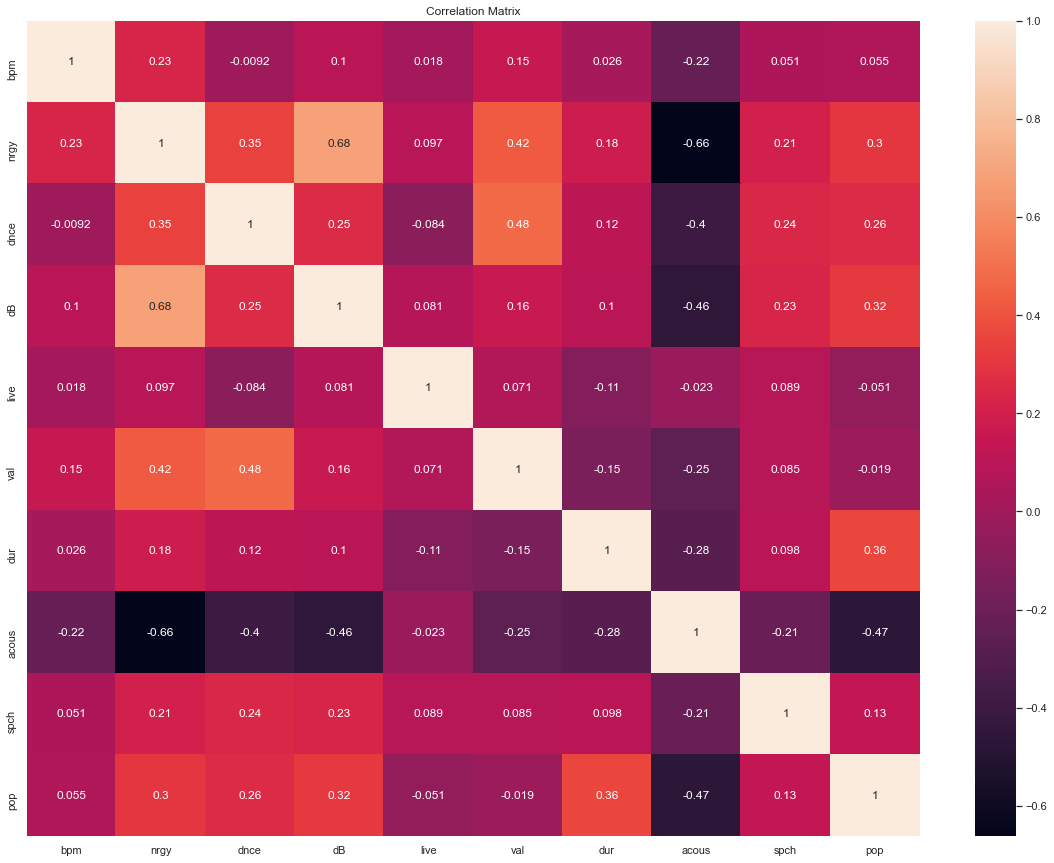

In [20]:
# Visualizing Correlation between the features
plt.figure(figsize=(20,15))

plt.title('Correlation Matrix')

sns.heatmap(music_df_num.corr(),  annot=True)

In the figure above we can see a heatmap showing the correlation between the nurmerical attributes. There is no serious linear relationship in the dataset between the variables.


There seems to be a strong positive correlation between energy(nrgy) and loudness(dB) and strong negative correlation between energy(nrgy) and Acoustic(acous). We may not want to include this three together in the final model as it might cause problems in the prediction of the popularity score of a song.

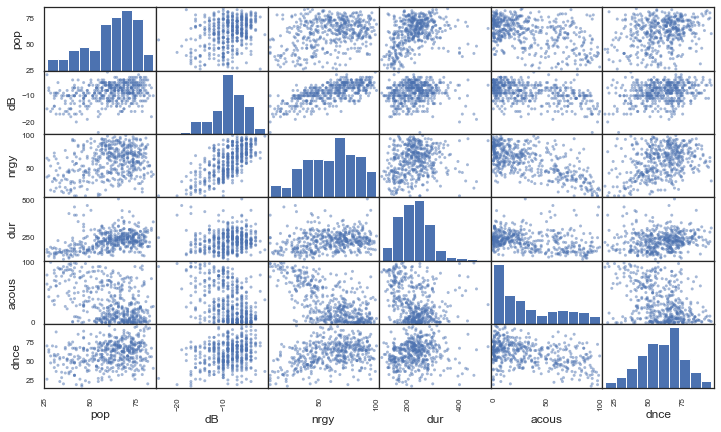

In [21]:
from pandas.plotting import scatter_matrix
features = ["pop", "dB", "nrgy", "dur",
"acous", "dnce"]
scatter_matrix(music_df_num[features], figsize=(12,7))
plt.show()

## Pairplot
To further visualize the relationship between all the variables, a pairplot was generated using 'sns.pairplot()'.


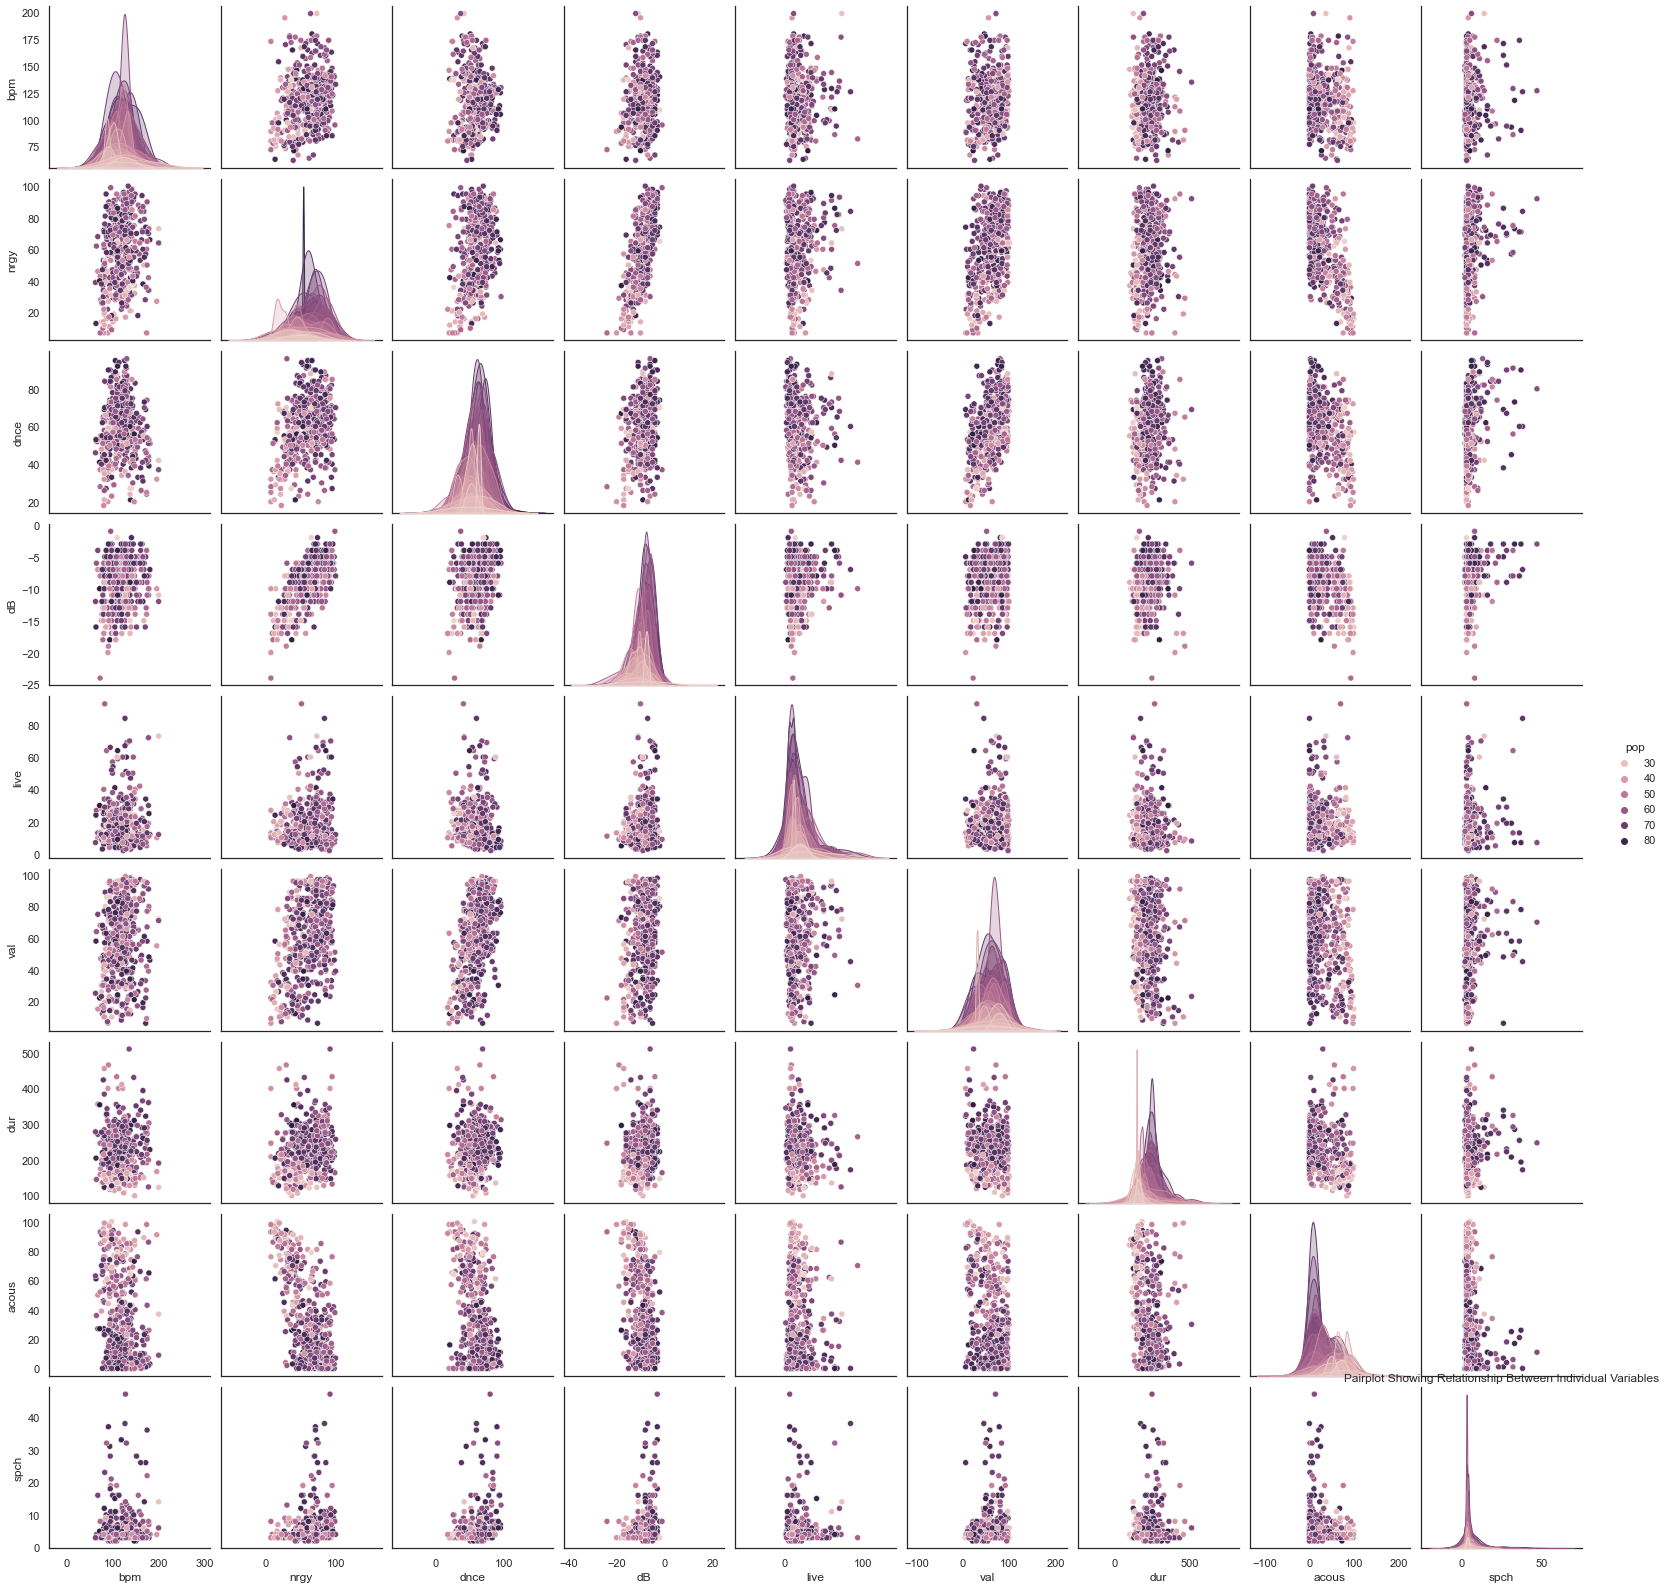

In [30]:
sns.pairplot(data=music_df_num.drop(['artist'], axis=1), hue='pop')
plt.title("Pairplot Showing Relationship Between Individual Variables")
plt.show()

### Relationship between independent variables

Investigating further the relationship between the individual variables 

#### 1. Loudness vs Energy

Text(0, 0.5, 'Loudness')

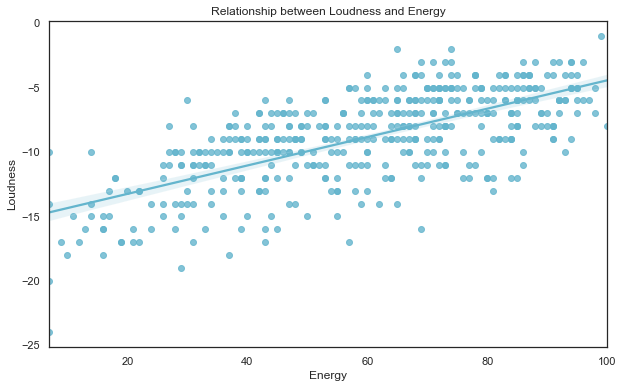

In [33]:
plt.figure(figsize = (10,6))
sns.regplot(data = music_df_num, y ='dB', x='nrgy', color= "c")
plt.title("Relationship between Loudness and Energy")
plt.xlabel('Energy')
plt.ylabel('Loudness')

#### 2. Popularity vs Acoustics

Text(0, 0.5, 'Popularity')

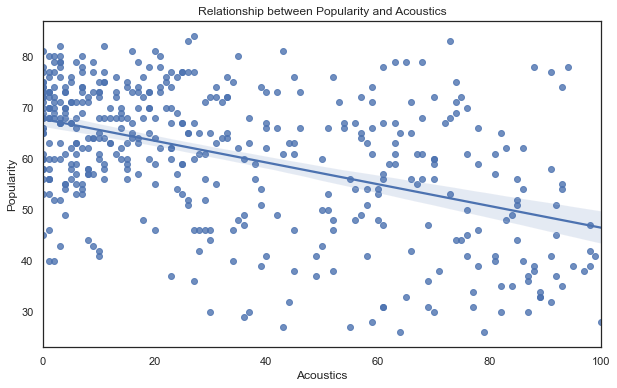

In [35]:
plt.figure(figsize = (10,6))
sns.regplot(data = music_df_num, y ='pop', x='acous', color= "b")
plt.title("Relationship between Popularity and Acoustics")
plt.xlabel('Acoustics')
plt.ylabel('Popularity')

#### 3. Popularity vs Duration


Text(0, 0.5, 'Popularity')

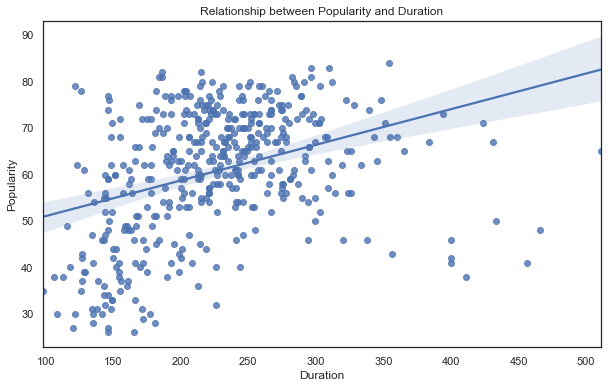

In [38]:
plt.figure(figsize = (10,6))
sns.regplot(data = music_df_num, y ='pop', x='dur', color= "b")
plt.title("Relationship between Popularity and Duration")
plt.xlabel('Duration')
plt.ylabel('Popularity')

From the plots above, loudness and Energy show a positive relationship, 
same with popularity and duration. However there is a negative relationship 
between popularity and acoustics

# Ordinal and One-Hot Encoding
We will go ahead to convert the artist column from text to numeric and keep only the popular artists as they may have a better effect on the prediction of the popularity score of a song. This  transformation will be done for the test data as well, so we can have the same number of columns in order to avoid any errors.

### Ordinal Encoding

In [43]:
#Subsetting artist column for the train set
music_artist = music_df_num[['artist']]


#Subsetting artist column for the test set
music_artist_test = music_test_df[['artist']]



We extracted the artist column from both our train and test data.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding of the train dataset
ordinal_encoder = OrdinalEncoder()
artist_cat_encoded = ordinal_encoder.fit_transform(music_artist)


# Ordinal Encoding of the test dataset
ordinal_test_encoder = OrdinalEncoder()
artist_test_encoded = ordinal_test_encoder.fit_transform(music_artist_test)


In [50]:
artist_names = ordinal_encoder.categories_
artist_test_names = ordinal_test_encoder.categories_



### One Hot Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding of the train Data
artist_encoder = OneHotEncoder(sparse=False)
artist_cat_1hot = artist_encoder.fit_transform(music_artist)

# One hot encoding of the test Data
artist_test_encoder = OneHotEncoder(sparse=False)
artist_test_1hot = artist_test_encoder.fit_transform(music_artist_test)


In [48]:
one_enc_data = pd.DataFrame(artist_cat_1hot)

one_enc_test = pd.DataFrame(artist_test_1hot)



In [51]:
one_enc_data.columns = artist_names[0]
one_enc_data.index = music_df_num.index

one_enc_test.columns = artist_test_names[0]
one_enc_test.index = music_test_df.index

In [53]:
one_enc_data

,*NSYNC,50 Cent,ABBA,ATB,Adam Faith,Afrika Bambaataa,Akon,Al Martino,Alice Coltrane,Alice DJ,...,Wamdue Project,Wayne Fontana & The Mindbenders,Wham!,White Lion,Whitesnake,Whitney Houston,Yazoo,Youngbloodz,Yusuf / Cat Stevens,ZZ Top
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#Selecting only popular artist
popu_artist = ["Elton John", "ABBA", "Queen", "The Beatles", "Whitney Houston", "Rihanna"]
popu_enc_artist = one_enc_data[popu_artist]


popu_enc_artist

,Elton John,ABBA,Queen,The Beatles,Whitney Houston,Rihanna
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
popu_test_artist = one_enc_test[["Elton John", "ABBA", "Queen", "The Beatles", "Whitney Houston", "Rihanna"]]

popu_test_artist

,Elton John,ABBA,Queen,The Beatles,Whitney Houston,Rihanna
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
109,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Merging columns to form a new trianing dataset
fin_music_df = pd.concat([music_df_num, popu_enc_artist], axis =1, ignore_index = False)
fin_music_df.drop(columns=['artist'], inplace = True)
fin_music_df

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Elton John,ABBA,Queen,The Beatles,Whitney Houston,Rihanna
0,107,31,45,-8,13,28,150,75,3,44,0.0,0.0,0.0,0.0,0.0,0.0
1,114,44,53,-8,13,47,139,49,3,37,0.0,0.0,0.0,0.0,0.0,0.0
2,105,36,63,-9,13,67,245,11,3,77,0.0,0.0,0.0,0.0,0.0,0.0
3,170,28,47,-16,13,33,232,25,3,67,0.0,0.0,0.0,0.0,0.0,0.0
4,121,47,56,-8,15,40,193,45,3,63,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,80,22,18,-17,10,16,214,92,4,45,0.0,0.0,0.0,0.0,0.0,0.0
449,148,81,53,-13,23,96,147,50,3,50,0.0,0.0,0.0,0.0,0.0,0.0
450,168,55,73,-8,20,61,289,23,14,77,0.0,0.0,0.0,0.0,0.0,0.0
451,165,87,64,-5,6,88,191,5,8,62,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Merging columns to form a new test dataset

new_test_df = pd.concat([music_test_df, popu_test_artist], axis =1, ignore_index = False)
new_test_df.drop(columns=['artist'], inplace = True)
new_test_df


,Id,title,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,Elton John,ABBA,Queen,The Beatles,Whitney Houston,Rihanna
0,454,Pump It,dance pop,2005,154,93,65,-3,75,74,213,1,18,0.0,0.0,0.0,0.0,0.0,0.0
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",glam rock,1994,161,39,30,-15,11,14,292,26,3,1.0,0.0,0.0,0.0,0.0,0.0
2,456,We Are The Champions - Remastered 2011,glam rock,1977,64,46,27,-7,12,18,179,38,3,0.0,0.0,1.0,0.0,0.0,0.0
3,457,Insomnia - Radio Edit,big beat,2010,127,92,71,-9,37,53,216,6,4,0.0,0.0,0.0,0.0,0.0,0.0
4,458,This Eve of Parting,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47,0.0,0.0,0.0,0.0,0.0,0.0
110,564,Dragostea Din Tei - Italian Version,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3,0.0,0.0,0.0,0.0,0.0,0.0
111,565,Big Poppa - 2005 Remaster,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,0.0,0.0,0.0,0.0,0.0,0.0
112,566,YMCA - Original Version 1978,disco,1978,127,97,72,-5,12,73,287,6,14,0.0,0.0,0.0,0.0,0.0,0.0


# Split Train Data

In [58]:
y = fin_music_df['pop'].values
X = fin_music_df.drop(['pop'], axis=1).values

We split our train data by creating training and test sets

In [59]:
test_features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'Elton John', 'ABBA', 'Queen', 'The Beatles', 
 'Whitney Houston', 'Rihanna']

# Base Models

## Linear Regression

Building first linear regression model using all features

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

We create test and training sets.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [62]:
# Create the linear regressor: reg_all
reg_all = LinearRegression()

In [63]:
# Fit the linear regression model to the training data
reg_all.fit(X_train, y_train)

LinearRegression()

The regressor is fitted to the training data.

In [64]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

We define a prediction on the test data.

In [65]:
# Compute and print R^2 and RMSE to evaluate the performace of the model

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.363884296848082
Root Mean Squared Error: 11.928326439299248


The RMSE of this linear model is 11.93 and the accuracy of the model is 0.3638.

In [1045]:
# Make predictions on the test data to submit to Kaggle

music_test_df['pop'] = reg_all.predict(new_test_df[test_features])

# Write predictions for submission to kaggle
music_test_df[['Id','pop']].to_csv('new_regall_sum.csv', index=False)

We submitted this prediction on Kaggle and we got a score of 8.54896, so we explored more methods to get a better base model.

# Cross Validation

Cross validation of the linear regression model

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X, y,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cv_scores)
rmse_scores

array([12.10447893, 11.7940594 , 10.43240219,  8.4063176 , 11.62453967,
       13.88719944, 11.28512907, 10.1863865 , 11.75654322,  9.23116361])

In [68]:
# Print the 5-fold cross-validation scores
print("Average 10-Fold rmse scores: {}".format(np.mean(rmse_scores)))

Average 10-Fold rmse scores: 11.070821963012543


# SVM Regression

We chose to use Non-linear SVR because of the little linear relationship in the train data. The kernel functions in non-linear SVR can transform the data into a higher dimensional feature space to make it possible to perform the linear separation. 
Its purpose is to fit as many instances as possible, while limiting margin violations.

In [69]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [70]:
# Create new training and test sets
vX_train, vX_test, vy_train, vy_test = train_test_split(X, y, test_size = 0.3, random_state=42)

We created new training and test sets for this approach.

In [71]:
# Linear Support Vector Regression model
svm_reg = SVR(kernel = "poly", degree=2, C=100, epsilon=1.5, gamma="scale") 

In [72]:
svm_reg.fit(vX_train, vy_train)

SVR(C=100, degree=2, epsilon=1.5, kernel='poly')

In [73]:
svm_pred = svm_reg.predict(vX_test)

In [75]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(svm_reg.score(vX_test, vy_test)))
rmse = np.sqrt(mean_squared_error(vy_test, svm_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.24084890181195873
Root Mean Squared Error: 12.423144670369373


We found the root mean squared error to be 12.42 and a lower accuracy which is worse than the linear regression model.

In [74]:
# Make predictions on the test data
music_test_df['pop'] = svm_reg.predict(new_test_df[test_features])

# Write predictions for submission to kaggle
music_test_df[['Id','pop']].to_csv('svm_reg.csv', index=False)

As expected the score for this prediction on Kaggle was 9.33500 which is definetely not better than the previous one and therefore we need to try more approaches in order to improve the prediction score.

# Ensemble Method


# Random Forest Regression
Using Random Forest Regression on all features

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
# Create training and test sets
rX_train, rX_test, ry_train, ry_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [78]:
rf = RandomForestRegressor(n_estimators=100,  random_state=0)

In [79]:
rf.fit(rX_train, ry_train)

RandomForestRegressor(random_state=0)

In [80]:
# Predict on the test data: y_pred
ry_pred = rf.predict(rX_test)

In [81]:
rf.score(rX_test, ry_test)

0.33817457586866706

In [82]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(rf.score(rX_test, ry_test)))
rmse = np.sqrt(mean_squared_error(ry_test, ry_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.33817457586866706
Root Mean Squared Error: 11.599496914800683


There was an improvement with the Random forest regressor model. The root mean squared error is found to be 11.5994 and the accuracy is score is still low but better than the previous models.

In [83]:
# Make predictions on the test data
music_test_df['pop'] = rf.predict(new_test_df[test_features])

# Write predictions for submission to kaggle
music_test_df[['Id','pop']].to_csv('new_rf_pred2.csv', index=False)

After submmitting this prediction on Kaggle, our score improved to 8.04563 and rank jumped to 28th position on the leaderboard. This was the best performing base model until now, so we tried to tune the hyperparmeters for a better performance and therefore improve our prediction score so we can have the best possible results.

# Randomized Search CV
Tuning Random Forest regressor Hyperparameters Using Randomized Search CV

In [84]:
# See all parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In this output we can see all the parameters we can change in order to get better prediction score.

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [87]:
rfr = RandomForestRegressor(n_jobs=1)



In [88]:
# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=rfr,
                            param_distributions=grid,
                            n_iter=10, # try 10 models total
                            cv=10, # 10-fold cross-validation
                            ) # print out results

In [89]:
rs_clf.fit(rX_train, ry_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]})

In [90]:
# Find the best hyperparameters
print(rs_clf.best_params_)

{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


We use this function above to find the best parameters

In [91]:
#Using best parameters for our Random Forest Model
rf_best = RandomForestRegressor(n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features='sqrt', 
                                max_depth=10) 

In [92]:
rf_best.fit(rX_train, ry_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=6,
                      n_estimators=1000)

Again we fit our training sets into the model with the new parameters.

In [93]:
# Predict on the test data: y_pred
rfy_pred = rf_best.predict(rX_test)

In [94]:
rf_best.score(rX_test, ry_test)

0.38465912059391605

In [95]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(rf_best.score(rX_test, ry_test)))
rmse = np.sqrt(mean_squared_error(ry_test, rfy_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.38465912059391605
Root Mean Squared Error: 11.184725098188869


The root mean squared error is found to be 11.18 and thus we expect an improvement in the prediction score when we submit it on Kaggle.

In [96]:
# Make predictions on the test data
music_test_df['pop'] = rf_best.predict(new_test_df[test_features])

# Write predictions for submission to kaggle
music_test_df[['Id','pop']].to_csv('new_pred.csv', index=False)

Although this new model has the highest accuracy of all, since we used the best parameters and the lowest RMSE, it scores only 8.15 on Kaggle, ranking it below the previous Random Forest Regressor Model. Therefore, there was no improvement when changing the parameters, so the best result we got for the prediction score was 8.04563 which places us now on 31st position on the leaderboard on Kaggle.

# Conclusion

All 3 regression model we tried for this project did not show any encouraging performace in the accuracy of the prediction. We conclude that if there were more instances to train the models on, we'd perhaps get a better perfomance. 

Our best perfoming model is the tuned Random Forest Regressor model and our final score on kaggle is 8.04563 (Group 4) leaving us in the 30th position as at the time of submitting this report.